### Assignment 3 - Numpy and Matplotlib¶

The goal of this assignment is to gain comfort creating, visualizating, and computing with numpy array. By the end of the assignment, you should feel comfortable:  

- working with and manipulating numpy arrays
- writing functions
- working with some real data and visualising it
 

## Part 1

### 1 Creating and Manipulating Arrays  

First import numpy and matplotlib

#### 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan  
Both should cover the range (-2, 2) and have 100 points in each direction

In [2]:
import numpy as np
from matplotlib import pyplot as plt


x = np.linspace(-2,2,200)
y = np.linspace(-2,2,200)

In [55]:
# two dimensional grids
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

((200, 200), (200, 200))

In [56]:
xx,yy=np.meshgrid(x,y)

### 1.2. Visualize each 2D array using pcolormesh
Use the correct coordinates for the x and y axes. Provide axis labels for all of your plots.

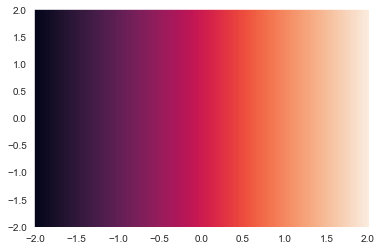

In [57]:
plt.pcolormesh(x,y,xx,shading='auto')

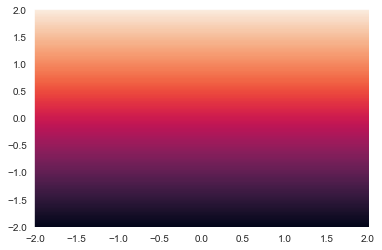

In [58]:
plt.pcolormesh(x,y,yy,shading='auto')


### 1.3 Convert cartesian to polar coordinates

where

$$ \varphi = atan2(y,x) $$

$$ r =\sqrt {x^2 + y^2} $$

In [59]:
phi = np.arctan2(yy,xx)
r = np.sqrt(xx**2+yy**2)

#### 1.4 Define the function $$ f = cos^2(4r) + sin^2(4\varphi) $$

plot as a function of x and y

In [60]:
f = np.cos(4*r)**2 +np.sin(4*phi)**2

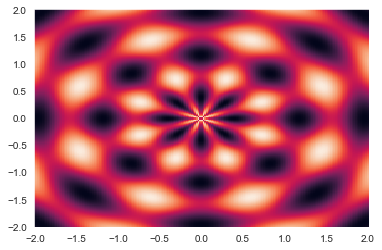

In [61]:
plt.pcolormesh(xx,yy,f,shading='auto')


#### 1.5 Plot the mean of f with respect to the x axis
as a function of y

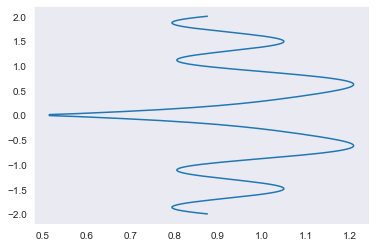

In [77]:
plt.plot(f.mean(0),y)

#### 1.6 Write a definition (function) that allows the user to plot f as a function of x or y

In [69]:

def plot_f(function=f,x=x,y=y,function_of='x'):
    if function_of==x:   
        plt.plot(function.mean(1),x)
    else: 
        fig=plt.figure(figsize=[6,5])
        plt.plot(function.mean(0),y)
    plt.close()
    return fig
    

/opt/anaconda3/envs/pytools_small/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


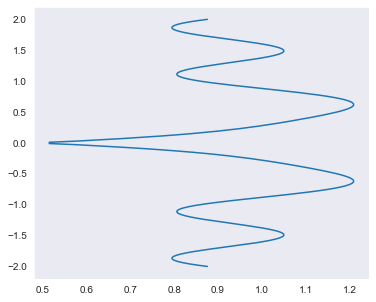

In [74]:
fig=plot_f(function_of='y')
fig

/opt/anaconda3/envs/pytools_small/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


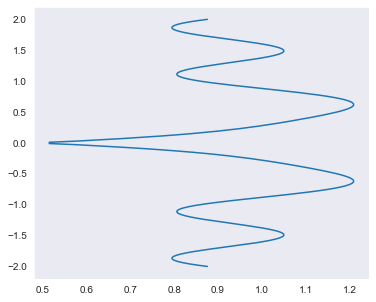

In [75]:
fig=plot_f(function_of='x')
fig

## Part 2: Analyze Argo data

Find a float to download [here](https://argovis.colorado.edu/ng/home?mapProj=WM&presRange=%5B0,2000%5D&selectionStartDate=2021-08-22T08:20:33Z&selectionEndDate=2021-09-05T08:20:33Z&threeDayEndDate=2021-09-03T08:20:33&shapes=%5B%5D&includeRealtime=true&onlyBGC=false&onlyDeep=false&threeDayToggle=true)

Follow the same method as the tutorial, 

1. download the data
2. Extract the temperature, pressure and salinity arrays 
3. Extract date, lat ,lon, 
4. Create a scatter plot of the positions of the ARGO float data. Color the positions by the date
5. Make two plots showing the time series of temperature and salinity (time on the xaxis, variable on the yaxis)

The data is downloaded as an xarray from argopy. We will work more on xarrays in the coming lectures!

use this code snippet to select one depth levels and plot a timeseries of data that is easier to interpret

```
argo_profiles = ds.argo.point2profile() # Convert points to profiles and 
argo_interp = argo_profiles.argo.interp_std_levels([10]) # Interpolate to pressure levels (depth 10 selected here)
selected_vars = argo_interp[["LATITUDE", "LONGITUDE", "TIME", "TEMP","PSAL"]] #select relevant variables
```

Note that you can call variables from xarray format using either ds['variable_you_want'] or ds.variable_you_want


### Download some data

In [16]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()

/opt/anaconda3/envs/pytools_small/lib/python3.6/site-packages/argopy/stores/filesystems.py:18: UserWarning: argopy needs tqdm installed to display progress bars
  warnings.warn("argopy needs tqdm installed to display progress bars")


In [17]:
ds = argo_loader.float(5906246).to_xarray()
print(ds)


<xarray.Dataset>
Dimensions:                (N_POINTS: 26237)
Coordinates:
  * N_POINTS               (N_POINTS) int64 0 1 2 3 ... 26233 26234 26235 26236
    LATITUDE               (N_POINTS) float64 -35.56 -35.56 ... -33.8 -33.8
    LONGITUDE              (N_POINTS) float64 1.129 1.129 1.129 ... 12.96 12.96
    TIME                   (N_POINTS) datetime64[ns] 2020-03-27T15:50:31 ... ...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_POINTS) int64 1 1 1 1 1 1 1 ... 53 53 53 53 53 53
    CYCLE_NUMBER           (N_POINTS) int64 1 1 1 1 1 1 1 ... 53 53 53 53 53 53
    DATA_MODE              (N_POINTS) <U1 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    DIRECTION              (N_POINTS) <U1 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_POINTS) int64 5906246 5906246 ... 5906246 5906246
    POSITION_QC            (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    PRES_QC                (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 

## extract data

In [80]:
T = ds['TEMP'].values
S =ds['PSAL'].values
P = ds['PRES'].values

In [84]:
time=ds.TIME
lat=ds.LATITUDE.values
lon=ds.LONGITUDE.values

## scatter plot of positions colored by time

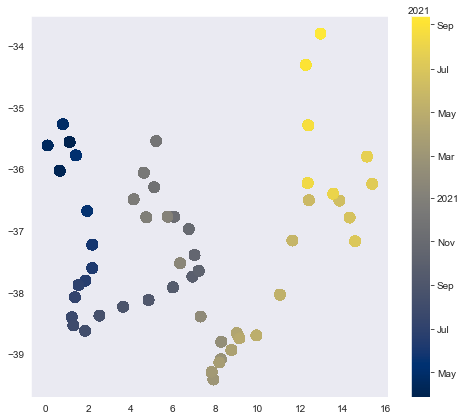

In [87]:
import matplotlib.dates as mdates


fig=plt.figure(figsize=[8,7])
cs=plt.scatter(lon,lat,s=100,c=mdates.date2num(time),cmap=plt.cm.cividis)   # convert dates to floats 
cbar=plt.colorbar(cs)
loc = mdates.AutoDateLocator()
cbar.ax.yaxis.set_major_locator(loc)
cbar.ax.yaxis.set_major_formatter(mdates.ConciseDateFormatter(loc))

# date ticks are not right 

## time series of temperature and salinity at 20 m 


In [40]:
argo_profiles = ds.argo.point2profile() # Convert points to profiles and 
argo_interp = argo_profiles.argo.interp_std_levels([20]) # Interpolate to pressure levels (depth 10 selected here)
selected_vars = argo_interp[["LATITUDE", "LONGITUDE", "TIME", "TEMP","PSAL"]] #select relevant variables


/opt/anaconda3/envs/pytools_small/lib/python3.6/site-packages/argopy/utilities.py:769: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  remapped = xr.apply_ufunc(_regular_interp, z, data, z_regridded, **kwargs)


In [42]:
T10 =selected_vars.TEMP.values
S10 = selected_vars.PSAL.values
time= selected_vars.TIME.values

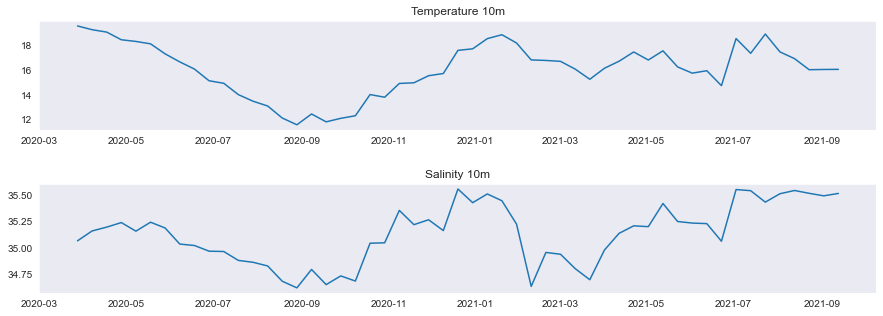

In [50]:
fig=plt.figure(figsize=[15,5])
ax1=fig.add_subplot(211)
ax1.plot(time,T10)
ax1.set_title('Temperature 10m')

ax2=fig.add_subplot(212)
ax2.plot(time,S10)
ax2.set_title('Salinity 10m')

fig.subplots_adjust(hspace=0.5)
